In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# 03. 数据科学的5个步骤
本章将重点介绍数据科学的第三步—`探索数据`(data exploration)。

## 3.1 数据科学简介
`数据科学`(data science)和`数据分析`(data analytic)的最大区别是什么？

有的人认为两者没有区别，有的人则认为两者千差万别。我认为，两者最大的不同在于数据科学严格遵循结构化、一步一步的操作过程，保证了分析结果的可靠性。

和其他科学研究一样，这些过程必须被严格执行，否则分析结果将不可靠。再直白一点，对于外行的数据科学家，严格遵循这些过程将能够快速获得准确结果。反之，如果没有清晰的路线图，则分析结果很难得到保证。

## 3.2 5个步骤概览
`数据科学`的 5 个必备步骤分别是：
1. 提出有意思的问题
2. 获取数据
3. 探索数据
4. 数据建模
5. 可视化和分享结果。

## 3.3 探索数据
`数据探索`的过程并不简单，它涉及识别数据类型、转换数据类型、使用代码系统性提高数据质量为模型做准备的能力。

当我们接触新数据集时，有5个基本问题需要回答。请牢记，这些问题并不是数据科学的起点和终点，它们是我们面对新数据集时需要遵循的基本原则。

### 3.3.1 数据探索的基本问题
每当接触新数据集时，在初次进行分析前回答以下问题都非常有必要。
+ 数据是有组织格式的，还是无组织格式的？如果数据是无组织格式的，我们需要将其转换为有组织的行列结构
+ 每一行代表什么？
+ 每一列代表什么？我们需要识别每一列的数据层次、定性/定量属性等。分类结果可能随着分析的不断深入而改变，但越早开始这一步越好
+ 是否有缺失值？数据并不完美。很多时候，人工或机械的错误将导致数据缺失。当这种错误发生时， 作为数据科学家，我们需要决定如何处理这些错误。
+ 是否需要对某些列进行数据转换？我们可能需要对某些列进行数据转换，这取决于该列的数据层次和定性/定量属性。比如，为了使用统计模型和机器学习模型，数据集中的每一列都需要是数值型的

自始至终，我们的核心问题是：**我们能从前期的推理统计中得到哪些信息？**我们希望对数据的理解比初次接触时更深。

### 3.3.2 数据集1：Yelp 点评数据
第1个数据集来自点评网站Yelp的公开数据，数据集中所有的身份识别信息已经被删除。

In [2]:
yelp_raw_data = pd.read_csv("data/yelp.csv") 
yelp_raw_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


**问题1：数据是有组织格式的，还是无组织格式的？**
数据源是非常好的行列结构，我们可以认为它是有组织格式的。

**问题2：每一行代表什么？**
每一行代表一条用户的评价。我们还会查看每一行和每一列的数据类型。 使用`DataFrame`的`shape`方法查看数据集的大小，结果显示，数据集有`10000`行和`10`列，即有10000个观测值和10个观测特征。

In [3]:
yelp_raw_data.shape

(10000, 10)

**问题3：每一列代表什么？** 数据集有10列：
+ `business_id`：每条评价对应的交易的唯一识别码。本列是`定类尺度`，因为识别码没有天然的顺序
+ `date`：每条评价的提交日期(年-月-日)。虽然时间通常被认为是连续数据，但本列应该被视为离散数据。本列属于`定序尺度`，因为日期有天然的顺序
+ `review_id`: 每条评价的唯一识别码。本列同样属于`定类尺度`，因为识别码没有天然的顺序
+ `stars`：评价者给每一个餐馆的最终评分。本列是有次序的`定性数据`，因此属于`定序尺度`
+ `text`：用户撰写的评价。对于大部分文本数据，我们将其归为`定类尺度`
+ `type`：本列前 5 行均为`review`，我们猜测它是标记每行是否为`review`的列，也就是说很可能存在不是`review`的行。我们随后将进行更深入的分析。本列属于`定类尺度`
+ `user_id`：每个提交评价的用户的唯一识别码，也属于`定类尺度`

当区分了所有列的`定序尺度`和`定类尺度`类型后，还需要继续回答以下两个问题。这两个问题很常见，值得提醒。

**问题4：是否有缺失值？** 
使用`isnull`方法判断是否有缺失值。

**问题5：是否需要对某些列进行数据转换？**
我们想知道是否需要改变定量数据的数值范围，或者是否需要为定性数据创建`哑变量`(dummy variables)？由于本数据集只有`定性数据`，所以我们将焦点放在`定序`和`定类`范围。

在进行数据探索之前，我们先对数据分析包`Pandas`的术语做一个简单了解。

##### DataFrame
当我们读取数据集时，Pandas将创建一个名为`DataFrame`类型的对象，你可以将它想象成电子表格。

In [4]:
type(yelp_raw_data)

pandas.core.frame.DataFrame

`DataFrame`本质上是一种二维结构，以行列结构存储数据。

由于我们处理的大部分数据都是有组织数据，所以`DataFrame`是`Pandas`中使用频率仅次于`Series`的对象。

##### Series
`Series`是简化版的`DataFrame`，它只有一个维度。`Series`本质上是由数据点组成的列表。`DataFrame`的每一列都可以被看作一个`Series`对象：

In [5]:
yelp_raw_data['business_id'].head(5)

0    9yKzy9PApeiPPOUJEtnvkg
1    ZRJwVLyzEJq1VAihDhYiow
2    6oRAC4uyJCsJl1X0WZpVSA
3    _1QQZuf4zZOyFCvXc0o6Vg
4    6ozycU1RpktNG2-1BroVtw
Name: business_id, dtype: object

In [6]:
type(yelp_raw_data['business_id'])

pandas.core.series.Series

##### 定性数据的探索技巧
对于定性数据，我们主要关注`定类尺度`和`定序尺度`。

**定类尺度列**
对于`定类尺度`列，列名描述了该列的含义，数据类型是定性数据。在Yelp数据集中，定类尺度列有`business_id`、`review_id`、`text`、`type`和`user_id`。我们使用Pandas进行更深入的分析：

In [7]:
yelp_raw_data['business_id'].describe()

count                      10000
unique                      4174
top       ntN85eu27C04nwyPa8IHtw
freq                          37
Name: business_id, dtype: object

`Pandas`自动识别出`business_id`列为定性数据。当`describe`函数作用于定性数据时，我们将得到以下4个统计信息：
+ `count`：该列含有多少个值
+ `unique`：该列含有多少个非重复值
+ `top`：该列出现次数最多的值
+ `freq`：该列出现次数最多的值的次数

对于`定类尺度`数据，我们通常观察以下几个特征，以决定是否需要进行数据转换:
+ 非重复项的个数是否合理(通常小于20个)？
+ 该列是自由文本吗？
+ 该列所有的行都不重复吗？ 

我们已经知道`business_id`列有10000个值，但千万别被骗了！这并不意味着真的有10000条交易评价，它仅仅意味着`business_id`列被填充了10000次。统计指标`unique`显示数据集有4174个不重复的餐馆，其中被评价次数最多的餐馆是`JokKtdXU7zXHcr20Lrk29A`， 总评价次数是37次。

In [8]:
yelp_raw_data['review_id'].describe()

count                      10000
unique                     10000
top       iUW-BlT3Nyn96HX3uEJxNA
freq                           1
Name: review_id, dtype: object

`count`和`unique`值均为10000。请你结合每一行和每一列代表的意思，思考几秒，这个结果合理吗？

当然是合理的！因为该列是每条评价的唯一识别码，每一行代表独立的、不重复的点评，所以`review_id`列含有10000个不重复值是合理的。`eTa5KD-LTgQv6UT1 Zmijmw`是出现次数最多的值，它只是从10000个值中随机选择的结果。

In [9]:
yelp_raw_data['text'].describe()

count                                                 10000
unique                                                 9998
top       This review is for the chain in general. The l...
freq                                                      2
Name: text, dtype: object

`text`列有点意思，它是用户撰写的评价。理论上，我们认为它也是不重复的文本，因为如果两个不同的人撰写的评价完全一致会非常诡异。但是，数据集中恰恰有两条评价完全一样！下面让我们花点时间学习一下`DataFrame`的数据筛选功能，然后再研究这一奇怪现象。

**Pandas中的筛选** 在`Pandas`中，基于特定条件对行进行筛选非常简单。对于DataFrame对象，只需一行一行检查是否满足特定条件即可，同时`Pandas`将判断结果存在一个`Series`对象中。

下面从数据集中提取出现两次的文本：

In [10]:
duplicate_text = yelp_raw_data['text'].describe()['top']
duplicate_text

"This review is for the chain in general. The location we went to is new so it isn't in Yelp yet. Once it is I will put this review there as well. We were there on Friday at 5 PM. \r\n\r\nThe reason I gave it 2 stars is because the burger was very good and it was made the way I asked for it. My husbands burger was not.\r\n\r\nBut, the server and the fries left a lot to be desired. Let me preface by saying that we had been to several other locations. I like my fries crispy. I ask for them well done, extra crispy, scorched, tortured hollow tubes. Whatever their buzz word is for well done. The location will comply. EVERY OTHER 5 GUYS HAS COMPLIED. But not the one at TATUM AND SHEA. She said that corporate said they are not to cook the fries that way. So if we were to put up with soggy fries - yes soggy, then we did not want them. \r\n\r\nShe also interrupted us several times which is rude. THEN she went and called corporate just to double check for us and she came to the table and said th

我们已经找出了重复文本，下面来创建判断真或假的`Series`对象：

In [11]:
text_is_the_duplicate = yelp_raw_data['text'] == duplicate_text

上面的代码将数据集中的`text`列和重复文本`duplicate_text`进行比较。这看起来有点不可思议，因为在将含有10000个元素的列表和1条文本做比较。

事实上，当我们将`Series`对象和另一个对象做比较时，相当于将`Series`中每个元素和该对象做比较，返回的结果是一个和`Series`对象长度相同的新`Series`对象:

In [12]:
# it is a Series of Trues and Falses
type(text_is_the_duplicate) 

pandas.core.series.Series

In [13]:
# shows a few Falses out of the Series
text_is_the_duplicate.head(5) 

0    False
1    False
2    False
3    False
4    False
Name: text, dtype: bool

Python可以像对数值一样，对真和假进行相加或相减。比如，`真+假-真+假+真==1`。所以，我们可以通过将`Series`对象的值相加来验证其是否正确：

In [14]:
sum(text_is_the_duplicate)

2

现在，我们已经有了布尔型`Series`对象，我们可以用括号将它传入`DataFrame`数据集中，得到筛选后的结果：

In [15]:
filtered_dataframe = yelp_raw_data[text_is_the_duplicate]
filtered_dataframe

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4372,jvvh4Q00Hq2XyIcfmAAT2A,2012-06-16,ivGRamFF3KurE9bjkl6uMw,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0
9680,rIonUa02zMz_ki8eF-Adug,2012-06-16,mutQE6UfjLIpJ8Wozpq5UA,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0


看起来我们的猜测是对的：某人在同一天、给同一连锁品牌的两家餐馆，撰写了相同的评语。

接着分析其他列：

In [16]:
yelp_raw_data['type'].describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

统计显示该列的列值只有一个：`review`。 

In [17]:
yelp_raw_data['user_id'].describe()

count                      10000
unique                      6403
top       fczQCSmaWF78toLEmb0Zsw
freq                          38
Name: user_id, dtype: object

和`business_id`类似，数据集由`6403`个用户的评价组成，其中评价次数最多的用户评价了`38`次！

**定序尺度列**
只有`date`和`stars`列属于定序尺度：

In [18]:
yelp_raw_data['stars'].describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

虽然该列是`定序尺度`，但`describe`方法将其看作`定量数据`，并返回相应的统计信息。 这是因为软件识别到一串数值后，以为我们希望查看平均值、最小值和最大值，这是正确的。

我们接着使用`value_counts`方法查看字段值的分布情况：

In [19]:
yelp_raw_data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

`value_counts`方法用于统计指定列字段值的分布。我们首先按照星级排序，再使用内置的`plot`方法制作条形图：

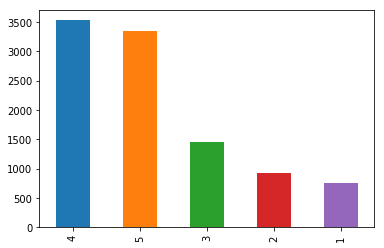

In [20]:
dates = yelp_raw_data['stars'].value_counts() 
dates.sort_values()
dates.plot(kind='bar')

### 3.3.3 数据集2：泰坦尼克
泰坦尼克数据集是包含乘客信息的样本数据。

In [21]:
titanic = pd.read_csv('data/short_titanic.csv') 
titanic.head()

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0


In [22]:
titanic.shape

(891, 5)

数据集有891行和5列，每一行代表一名乘客，每一列的含义如下。
+ Survived：这是一个二元变量(binary variable)，表示乘客是否在灾难中幸存，`1`表示幸存，`0`表示罹难。该字段为定类尺度，因为字段值仅有两个
+ Pclass：舱位等级，`3`表示三等舱，以此类推。该字段为定序尺度
+ Name：这是乘客的姓名。该字段毫无疑问是定类尺度
+ Sex：这是乘客的性别，定类尺度
+ Age：这个字段有些特殊。理论上，年龄既可以是定性数据，也可以是定量数据，然而，我认为年龄应该具有定量的特征，因此它属于定比尺度

通常情况下，`数据转换`是指忽略被转化列的定性特征，将其转为数值型。对于泰坦尼克数据集，我们需要将`Name`列和`Sex`列转换为数值型。对于`Sex`列，我们可以用1表示女性，0表示男性。如下所示：

In [23]:
titanic['Sex'] = np.where(titanic['Sex']=='female', 1, 0)
titanic['Sex'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: int64

下面快速查看所有列的信息：

In [24]:
titanic.describe()

,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,0.352413,29.699118
std,0.486592,0.836071,0.477990,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,20.125000
50%,0.000000,3.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


`Sex`列已经被作为定量数据对待。`Age`列仅有714个值，说明`Age`列有缺失值！我们使用`Pandas`的`isnull`和`sum`函数来验证：

In [25]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
dtype: int64

面对缺失值时通常有两个选择：
+ 删除含有缺失值的行
+ 尝试填充数据

删除行是最简单的选择，但你面临着丢失有价值数据的风险。例如，本例中有177行缺失年龄信息，接近全部数据的20%。为了填充数据，我们要么查阅历史资料，找出每一个乘客的真实年龄，要么用占位符进行填充。

下面我们用数据集中所有乘客的平均年龄填充缺失值：

In [26]:
average_age = titanic['Age'].mean()
titanic['Age'].fillna(average_age, inplace = True)
sum(titanic['Age'].isnull())

0

有了以上数据集，我们就可以回答更复杂的问题。比如，男性或女性的平均年龄分别是多少？我们可以先按性别进行筛选，再计算平均值。`Pandas`的`groupby`函数可以实现这个功能，用法如下：

In [27]:
titanic.groupby('Sex')['Age'].mean()

Sex
0    30.505824
1    28.216730
Name: Age, dtype: float64

## 3.4 总结
这是我们第一次按照数据科学的5个步骤进行数据探索。从现在起，每当我们遇到一个新的数据集，都将使用以上数据探索步骤对数据进行转换、分解和标准化。尽管本章介绍的步骤仅仅是一个指引，但为每个数据科学家 建立了工作中可遵循的实践标准。这些步骤适用于任何数据集。

我们很快将进入本书的统计学、概率论和机器学习模型部分。在此之前，我们有必要掌握基础的数学知识。因此在下一章，我们将学习应用复杂模型所需的数学知识。